<a href="https://colab.research.google.com/github/Hieuab1308/Th-gi-c-m-y-t-nh/blob/main/Nguyen_Danh_Hieu_Tuan5_Bai10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

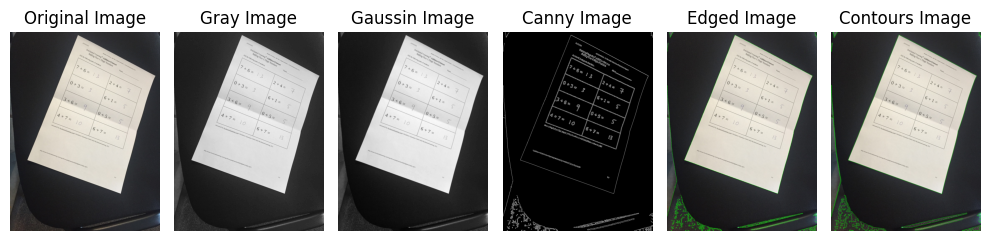

In [ ]:
!pip install pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

image = cv2.imread('/content/scan (3).jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_Gaussin = cv2.GaussianBlur(image_gray, (3,3),0)
image_canny = cv2.Canny(image_Gaussin, 40, 130)


contours, _ = cv2.findContours(image_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 1)

kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(image_canny, kernel, iterations=1)
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours, -1, (0, 255, 0), 1)

plt.figure(figsize=(10,10))
plt.subplot(1,6,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(image_gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.subplot(1,6,3)
plt.imshow(image_Gaussin, cmap='gray')
plt.title('Gaussin Image')
plt.axis('off')

plt.subplot(1,6,4)
plt.imshow(image_canny, cmap='gray')
plt.title('Canny Image')
plt.axis('off')

plt.subplot(1,6,5)
plt.imshow(image_copy, cmap='gray')
plt.title('Edged Image')
plt.axis('off')

plt.subplot(1,6,6)
plt.imshow(image_copy1)
plt.title('Contours Image')
plt.axis('off')

plt.tight_layout()
plt.show()



Original Image:
Enchanted Leaming” Addition Printout
Adding Two 1-Digit Numbers

 

Name

 

 

 

 

 

 


Binary Image:
 

agar

Ai tgp feb

Ase eto ie tes {ip neers ct
Enchanted Leorulg® Addit Printout
‘Adding Two 1-Digit Numbers

Wane

 

|7+62 13

 

oeae. 3

 

ea BEBE orne [O85

 

4#7= }0

 

6+7= 13

 

 

 

cusp Lacaimagun ni oeeanbamriniais

lien aeyarig anieinennmaitogetesn

 

 



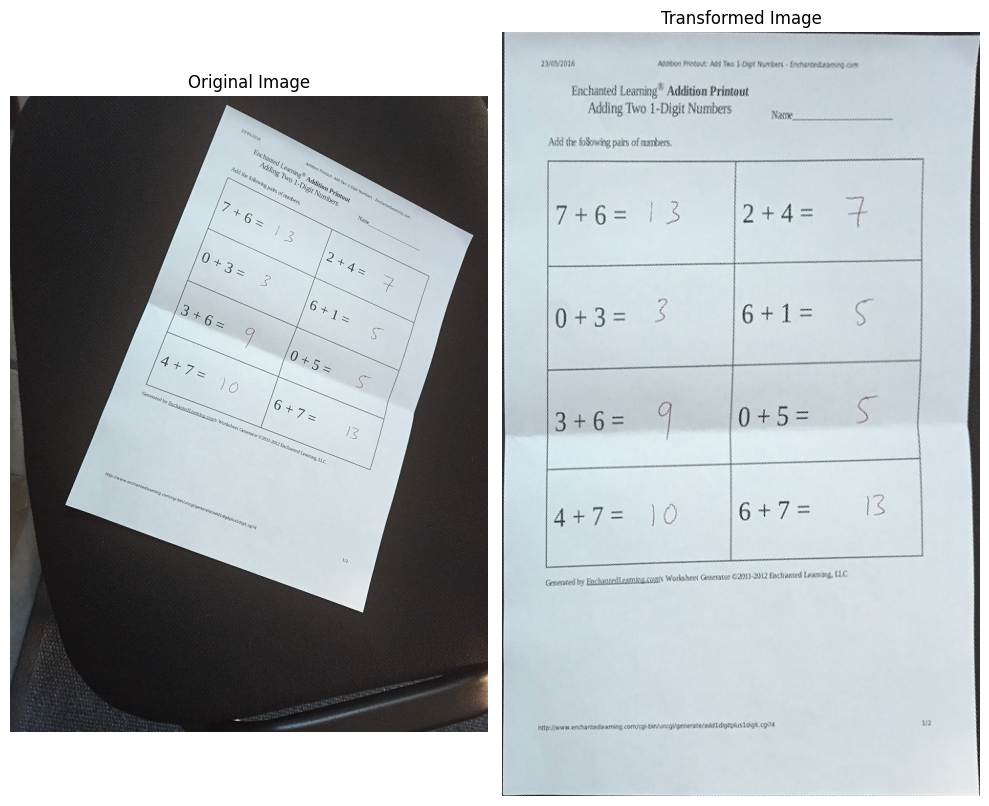

In [ ]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
for cnt in sorted_contours:
  # approximate the contour
  perimeter = cv2.arcLength(cnt, True)
  approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)
  if len(approx) == 4:
    break
inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                       [0,800],
                       [500,800],
                       [500,0]])

# Get our Transform Matrix, M
M = cv2.getPerspectiveTransform(inputPts, outputPts)

# Apply the transform Matrix M using Warp Perspective
dst = cv2.warpPerspective(image, M, (500,800))

binary_image = cv2.adaptiveThreshold(cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY),255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 3)
text_original = pytesseract.image_to_string(dst)
text_binary = pytesseract.image_to_string(binary_image)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')

print("Original Image:")
print(text_original)

print("\nBinary Image:")
print(text_binary)

plt.tight_layout()
plt.show()

# Mục mới